<a href="https://colab.research.google.com/github/KudryashovDmitry/PDA_SOL/blob/main/PW_03_%D0%9A%D1%83%D0%B4%D1%80%D1%8F%D1%88%D0%BE%D0%B2_%D0%94_%D0%90_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 3. Программные средства консолидации данных

## Цель работы
Освоить практические навыки консолидации данных из различных источников с использованием Python и библиотеки pandas.

## Задачи
1. Загрузить данные из различных источников (CSV, Excel, JSON).
2. Провести предварительную обработку и очистку данных.
3. Объединить данные из разных источников.
4. Выполнить агрегацию и трансформацию данных.
5. Сохранить консолидированные данные в новый файл.

## Необходимое программное обеспечение
- Python 3.x
- Библиотеки: pandas, numpy, matplotlib

## Исходные данные
- `sales_2022.csv`: данные о продажах за 2022 год
- `sales_2023.xlsx`: данные о продажах за 2023 год
- `products.json`: информация о продуктах


Вариант 17.
1. Файл CSV: список товаров на складе (артикул, категория, количество).
2. Файл Excel: данные о продажах (артикул товара, дата, количество).
3. Файл JSON: данные о спросе на товары по категориям.
Задача: объединить данные и рассчитать прогнозный остаток товаров на
складе.

## Ход работы

Процесс создания тестовых данных для файлов
- `sales_data_2022.csv`
- `sales_data_2023.xlsx`
- `products_data.json`


In [ ]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import random


In [ ]:
# Функция для генерации случайной даты
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

1. Генерация данных о продуктах (CSV): Создаётся 1000 товаров с уникальными артикулами и случайными категориями. Количество на складе варьируется от 1 до 500.

In [ ]:
# Генерация данных о продуктах на складе (CSV)
categories = ['Электроника', 'Одежда', 'Книги', 'Бытовая техника', 'Спорттовары']
products = []

for i in range(1, 1001):  # Генерация 1000 товаров
    product = {
        'article': f'A{i:04}',  # Артикул в формате A0001, A0002 и т.д.
        'category': random.choice(categories),
        'quantity': random.randint(1, 500)  # Количество на складе
    }
    products.append(product)

df_products = pd.DataFrame(products)
df_products.to_csv('products_stock.csv', index=False)
print("Файл products_stock.csv создан")

Файл products_stock.csv создан


2. Генерация данных о продажах (Excel): Создаётся по 10,000 и 13000 записей о продажах за 2022 и 2023 годы. Для каждой записи указывается дата продажи, артикул товара и количество проданных единиц.

In [ ]:
# Генерация данных о продажах за 2022 и 2023 годы (Excel)
# Периоды для генерации
start_date_2022 = datetime(2022, 1, 1)
end_date_2022 = datetime(2022, 12, 31)
start_date_2023 = datetime(2023, 1, 1)
end_date_2023 = datetime(2023, 12, 31)

# Генерация данных о продажах за 2022 год
sales_2022 = []

for _ in range(10000):  # Генер 10000 записей о продажах за 2022 год
    product = random.choice(products)
    sale = {
        'article': product['article'],
        'date': random_date(start_date_2022, end_date_2022).strftime('%Y-%m-%d'),
        'quantity': random.randint(1, 20)  # Продано от 1 до 20 ед товара
    }
    sales_2022.append(sale)

df_sales_2022 = pd.DataFrame(sales_2022)
df_sales_2022.to_excel('sales_2022.xlsx', index=False)
print("Файл sales_2022.xlsx создан")

Файл sales_2022.xlsx создан


3. Создание sales_2023.xlsx:
   - Процесс аналогичен созданию файла за 2022 год, но с некоторыми отличиями:
   - Генерируется большее количество записей (13000) для имитации роста продаж.
   - Максимальное количество проданных единиц увеличено до 15 для создания вариативности.
   - Данные сохраняются в формате Excel (xlsx).

In [ ]:
# Генерация данных о продажах за 2023 год
sales_2023 = []

for _ in range(13000):  # Ген-ем 13000 записей о продажах за 2023 год
    product = random.choice(products)
    sale = {
        'article': product['article'],
        'date': random_date(start_date_2023, end_date_2023).strftime('%Y-%m-%d'),
        'quantity': random.randint(1, 20)  # Продано от 1 до 20 ед товара
    }
    sales_2023.append(sale)

df_sales_2023 = pd.DataFrame(sales_2023)
df_sales_2023.to_excel('sales_2023.xlsx', index=False)
print("Файл sales_2023.xlsx создан")

Файл sales_2023.xlsx создан


3. Генерация данных о спросе (JSON): Для каждой категории товаров генерируется случайный коэффициент спроса (от 0.5 до 1.0).


In [ ]:
# Генерация данных о спросе по категориям (JSON)
demand_data = []

for category in categories:
    demand = {
        'category': category,
        'demand': round(random.uniform(0.5, 1.0), 2)  # Случайный коэффициент спроса от 0.5 до 1.0
    }
    demand_data.append(demand)

df_demand = pd.DataFrame(demand_data)
df_demand.to_json('demand_data.json', orient='records')
print("Файл demand_data.json создан")

Файл demand_data.json создан


In [ ]:
ls

demand_data.json  products_stock.csv  sales_2022.xlsx  sales_2023.xlsx  sample_data/


Особенности сгенерированных данных:
- Все файлы связаны между собой через поле product_id.
- Данные имеют реалистичную структуру и вариативность.
- В данных присутствуют различные типы полей: строковые (категории, ID), числовые (цены, количество), даты.

### Шаг 1: Подготовка рабочей среды

1. Создайте новый Python-скрипт `data_consolidation.py`.
2. Импортируйте необходимые библиотеки:



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# агрузка данных
df_products = pd.read_csv('products_stock.csv')
df_sales_2022 = pd.read_excel('sales_2022.xlsx')
df_sales_2023 = pd.read_excel('sales_2023.xlsx')
df_demand = pd.read_json('demand_data.json')

### Шаг 2: Загрузка данных
1. Загрузите данные из CSV-файла:

In [ ]:
df_2023 = pd.read_csv('products_stock.csv')
print("\nДанные о продукте год:")
print(df_2023.head())


Данные о продукте год:
  article         category  quantity
0   A0001  Бытовая техника       303
1   A0002            Книги       174
2   A0003      Спорттовары       341
3   A0004      Электроника       316
4   A0005           Одежда       405


2. Загрузите данные из Excel-файла:

In [ ]:
df_2022 = pd.read_excel('sales_2022.xlsx')
print("\nДанные за 2022 год:")
print(df_2022.head())


Данные за 2022 год:
  article        date  quantity
0   A0366  2022-05-21         1
1   A0479  2022-02-24         2
2   A0248  2022-07-28         9
3   A0424  2022-05-06         1
4   A0258  2022-08-25         6


In [ ]:
df_2023 = pd.read_excel('sales_2023.xlsx')
print("\nДанные за 2023 год:")
print(df_2023.head())


Данные за 2023 год:
  article        date  quantity
0   A0375  2023-07-16         2
1   A0720  2023-01-20        13
2   A0405  2023-01-19        17
3   A0790  2023-05-29        18
4   A0234  2023-07-02        12


3. Загрузите данные из JSON-файла:

In [ ]:
df_demand_data = pd.read_json('demand_data.json')
print("\nДанные о спросе:")
print(df_demand_data.head())


Данные о спросе:
          category  demand
0      Электроника    0.81
1           Одежда    0.80
2            Книги    0.56
3  Бытовая техника    0.77
4      Спорттовары    0.68


### Шаг 3: Предварительная обработка и очистка данных
1. Проверьте наличие пропущенных значений:

In [ ]:
print("\nПропущенные значения:")
print(df_2022.isnull().sum())
print(df_2023.isnull().sum())
print(df_demand_data.isnull().sum())


Пропущенные значения:
article     0
date        0
quantity    0
dtype: int64
article     0
date        0
quantity    0
dtype: int64
category    0
demand      0
dtype: int64


3. Приведите названия столбцов к единому формату:

In [ ]:
df_products.columns = df_products.columns.str.lower()
df_sales_2022.columns = df_sales_2022.columns.str.lower()
df_sales_2023.columns = df_sales_2023.columns.str.lower()
df_demand.columns = df_demand.columns.str.lower()

### Шаг 4: Объединение данных
1. Объедините данные о продажах за 2022 и 2023 годы:

In [ ]:
df_sales = pd.concat([df_sales_2022, df_sales_2023], ignore_index=True)
print(df_sales)

      article        date  quantity
0       A0366  2022-05-21         1
1       A0479  2022-02-24         2
2       A0248  2022-07-28         9
3       A0424  2022-05-06         1
4       A0258  2022-08-25         6
...       ...         ...       ...
22995   A0429  2023-10-29         6
22996   A0270  2023-08-07         2
22997   A0533  2023-03-09         2
22998   A0497  2023-12-29         6
22999   A0936  2023-03-23         4

[23000 rows x 3 columns]


2. Добавьте информацию о продуктах к данным о продажах:

In [ ]:
df_consolidated = pd.merge(df_sales, df_products, on='article', how='left')
print("\nКонсолидированные данные:")
print(df_consolidated.head())


Консолидированные данные:
  article        date  quantity_x         category  quantity_y
0   A0366  2022-05-21           1  Бытовая техника         449
1   A0479  2022-02-24           2  Бытовая техника         350
2   A0248  2022-07-28           9  Бытовая техника          70
3   A0424  2022-05-06           1  Бытовая техника         430
4   A0258  2022-08-25           6      Электроника         136


### Шаг 5: Агрегация и трансформация данных
Рассчитайте общую сумму продаж по категориям продуктов:

In [ ]:
print(df_consolidated.columns)


Index(['article', 'date', 'quantity_x', 'category', 'quantity_y'], dtype='object')


In [ ]:
# Удаление лишнего столбца quantity_y
df_consolidated.drop(columns=['quantity_y'], inplace=True)
df_consolidated.rename(columns={'quantity_x': 'sales'}, inplace=True)

1. Рассчитаем общую сумму продаж по категориям продуктов

In [ ]:
sales_by_category = df_consolidated.groupby('category')['sales'].sum().sort_values(ascending=False)
print("\nОбщая сумма продаж по категориям:")
print(sales_by_category)


Общая сумма продаж по категориям:
category
Электроника        51186
Бытовая техника    49710
Спорттовары        47901
Одежда             46774
Книги              44824
Name: sales, dtype: int64


2. Создайте новый столбец с годом продажи:

In [ ]:
df_consolidated['year'] = pd.to_datetime(df_consolidated['date']).dt.year

3. Рассчитайте среднюю сумму продаж по годам:

In [ ]:
avg_sales_by_year = df_consolidated.groupby('year')['sales'].mean()
print("\nСредняя сумма продаж по годам:")
print(avg_sales_by_year)


Средняя сумма продаж по годам:
year
2022    10.477200
2023    10.432538
Name: sales, dtype: float64


### Шаг 6: Визуализация данных
1. Создайте график продаж по категориям:


График 'Общая сумма продаж по категориям' сохранен как 'sales_by_category.png'


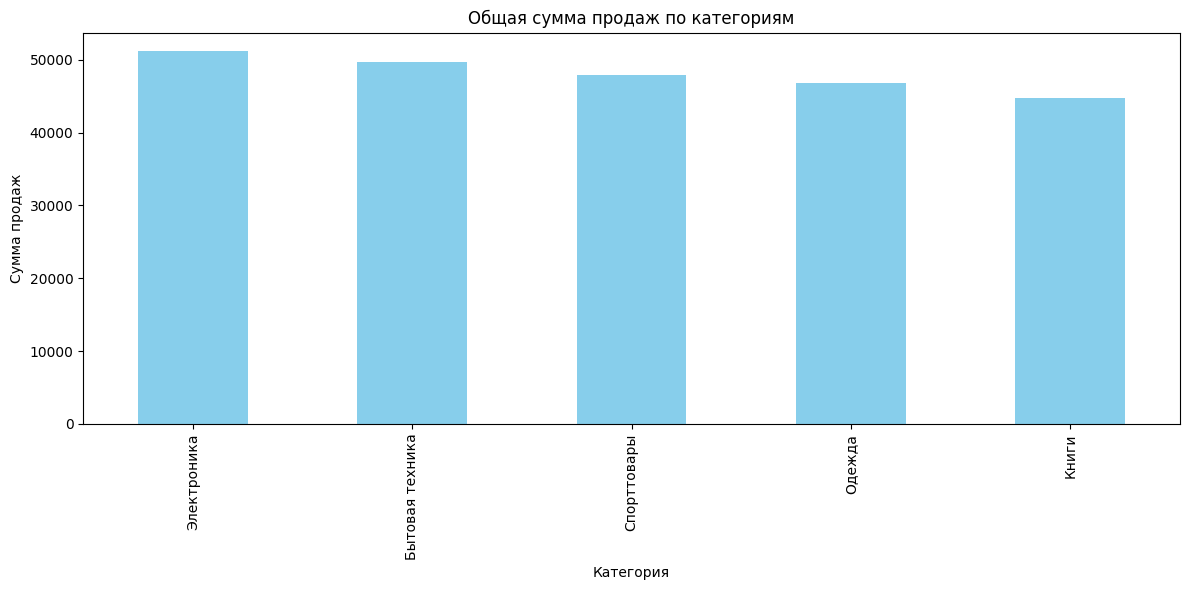

In [ ]:
plt.figure(figsize=(12, 6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Общая сумма продаж по категориям')
plt.xlabel('Категория')
plt.ylabel('Сумма продаж')
plt.tight_layout()
plt.savefig('sales_by_category.png')
print("\nГрафик 'Общая сумма продаж по категориям' сохранен как 'sales_by_category.png'")

2. Создайте график средних продаж по годам:


График 'Средняя сумма продаж по годам' сохранен как 'avg_sales_by_year.png'


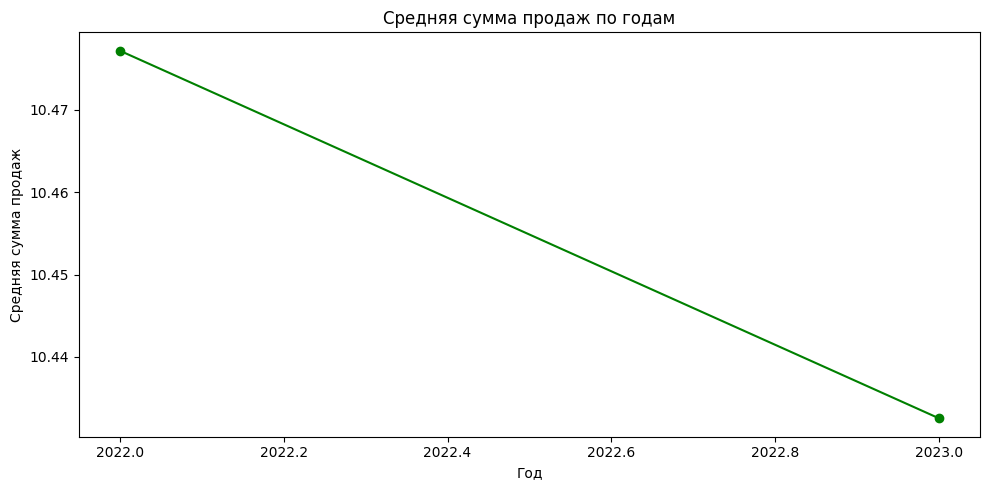

In [ ]:
plt.figure(figsize=(10, 5))
avg_sales_by_year.plot(kind='line', marker='o', color='green')
plt.title('Средняя сумма продаж по годам')
plt.xlabel('Год')
plt.ylabel('Средняя сумма продаж')
plt.tight_layout()
plt.savefig('avg_sales_by_year.png')
print("\nГрафик 'Средняя сумма продаж по годам' сохранен как 'avg_sales_by_year.png'")

### Шаг 7: Сохранение консолидированных данных
Сохраните консолидированные данные в CSV-файл:

In [ ]:
df_consolidated.to_csv('consolidated_sales_data.csv', index=False)
print("\nКонсолидированные данные сохранены в файл 'consolidated_sales_data.csv'")


Консолидированные данные сохранены в файл 'consolidated_sales_data.csv'


In [ ]:
from google.colab import files

# Скачиваем CSV файл
files.download('consolidated_sales_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>